# Assignment 10 Answer

- There are some lecture references in this document. They are notes to myself and can be ignored.

In [19]:
import sympy.physics.control as spc
import scipy
from scipy.integrate import odeint
import numpy as np
import sympy as sp
import sympy.abc as abc
import matplotlib.pyplot as plt

## Q1

- Lecture 237 S is a noncausal system
- Lecture 212 E^{At} = transition matrix

The system:

$x_1(t) = e^{3t} - 2te^{3t}$

May be generated by the system:

$A = \begin{bmatrix} 3 & 1 \\ 0 & 3 \end{bmatrix}$

with the initial conditions $(1, -2)$.

In [20]:
A = sp.Matrix([
    [3, 1],
    [0, 3]
])

In [21]:
t = sp.symbols('t')

y0 = sp.Matrix([1, -2])
y, dy = sp.exp(A*t)@y0
y

-2*t*exp(3*t) + exp(3*t)

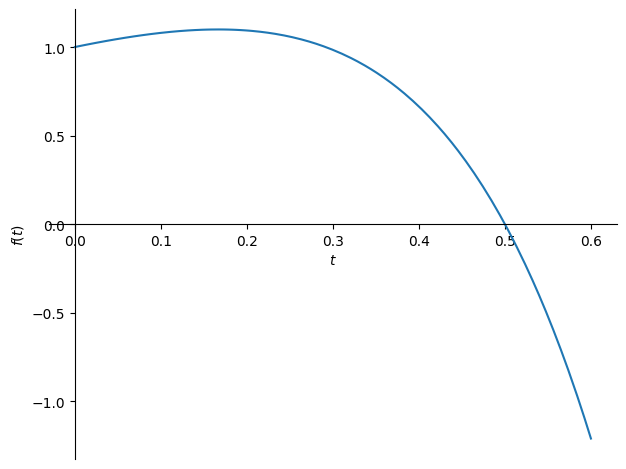

In [22]:
sp.plot(y, (t, 0, 0.6))
plt.show()

## Q2

Lecture 235 Partial fraction decompositions and free evolutions

- For $n>1$ the system is not diagonisable
- That means the system does not have a full set of independent eigenvectors.

Honestly i find the Jordan representation of this quite helpful in remembering:

$e^{At} = \begin{bmatrix} e^\lambda & te^\lambda & t^2e^\lambda \\
0 & e^\lambda & te^\lambda \\
0 & 0 & e^\lambda \end{bmatrix}$


## Q3

### 1

Fastly decaying oscillatory behaviour:

In [23]:
A, s, zeta, w = sp.symbols('A s zeta w')

In [24]:
H1 = A/(s**2 + 2*zeta*w*s + w**2)
H1

A/(s**2 + 2*s*w*zeta + w**2)

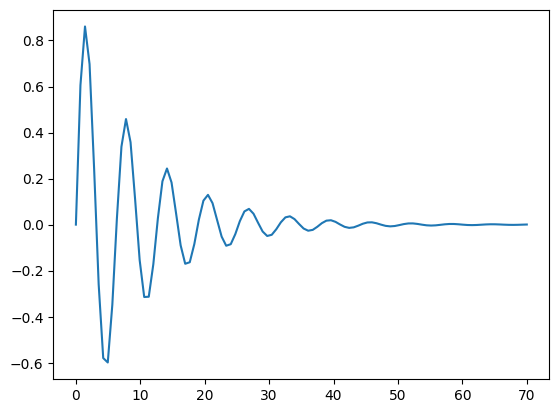

In [25]:
zeta_val = 0.1
w_val = 1
gain = 1
plt.plot(*scipy.signal.impulse(([gain], [1, 2*zeta_val*w_val, w_val**2])))
plt.show()

Slowly decaying exponential:

In [26]:
tau = sp.symbols('tau')

H2 = 1/(s + tau)
H2

1/(s + tau)

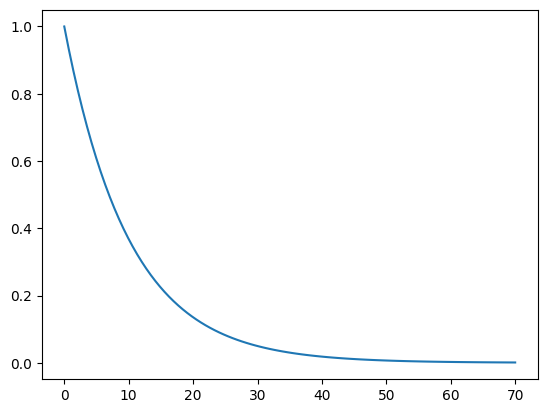

In [27]:
tau_val = 0.1

plt.plot(*scipy.signal.impulse(([1], [1, tau_val])))
plt.show()

Combine them:

In [28]:
H1*H2.expand()

A/((s + tau)*(s**2 + 2*s*w*zeta + w**2))

In [29]:
(H1*H2).expand()

A/(s**3 + s**2*tau + 2*s**2*w*zeta + 2*s*tau*w*zeta + s*w**2 + tau*w**2)

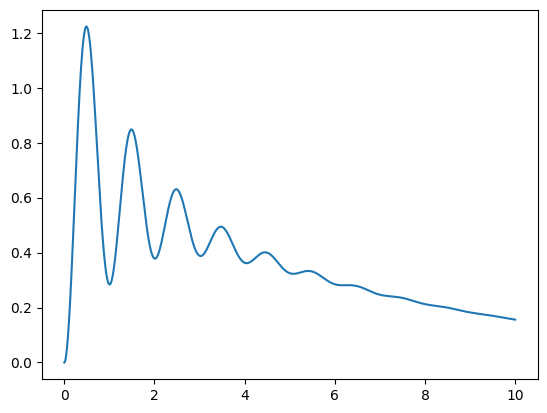

In [30]:
zeta_val = 0.05
w_val = 2*np.pi
tau_val = 1/1
gain = 30
t = np.linspace(0, 10, 1000)
plt.plot(*scipy.signal.impulse(([gain], [1, tau_val + 2*w_val*zeta_val, 2*tau_val*w_val*zeta_val + w_val**2, tau_val*w_val]), T=t))
plt.show()

The plot above shows a system with a fastly vanishing oscillatory behavior on top of a slowly vanishing exponential decay.

### 2

In [31]:
tf = spc.TransferFunction(gain, s**3 + (tau_val + 2*w_val*zeta_val)*s**2 + (2*tau_val*w_val*zeta_val + w_val**2)*s + tau_val*w_val, abc.s)
tf

TransferFunction(30, s**3 + 1.62831853071796*s**2 + 40.1067361350754*s + 6.28318530717959, s)

The poles are the solutions for $s$ in the polynomial of the denominator.

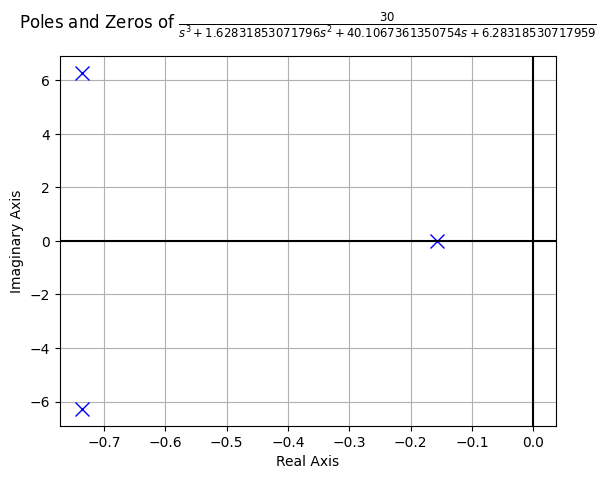

In [32]:
spc.control_plots.pole_zero_plot(tf)

Poles are Re < 0 and Im != 0 meaning the system is asymptotically stable.

### 3

The amplitude can be changed by increasing or decreasing the gain of the system.